Presentation Link: https://drive.google.com/file/d/1fWbPjROZaEpxNdUq2A9RTzt4nbgbqlVO/view?usp=drive_link

#Data Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam

In [ ]:
data = pd.read_csv("/content/garments_worker_productivity.csv")

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.shape

(1197, 15)

In [ ]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
data.drop(['wip'], axis=1)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.info

<bound method DataFrame.info of            date   quarter  department        day  team  targeted_productivity  \
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80   
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.70

In [ ]:
dept_dist = dict(data['department'].value_counts())
quarter_dist = dict(data['quarter'].value_counts())


In [ ]:
bp = px.bar(data,
            x = list(dept_dist.keys()),
            y=list(dept_dist.values()),
            labels={'x': 'dept', 'y': 'count'}
          )

bp.update_layout(
    title={
        'text': "Department Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size = 36,
    font_size=18,
)

In [ ]:
bp = px.bar(data,
            x = list(quarter_dist.keys()),
            y=list(quarter_dist.values()),
            labels={'x': 'Quarter', 'y': 'count'}

          )

bp.update_layout(
    title={
        'text': "Quarter Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size = 36,
    font_size=18,
)

In [ ]:
lp = px.line(data, y = 'actual_productivity', color = 'department')
lp.show()

<Axes: xlabel='date', ylabel='actual_productivity'>

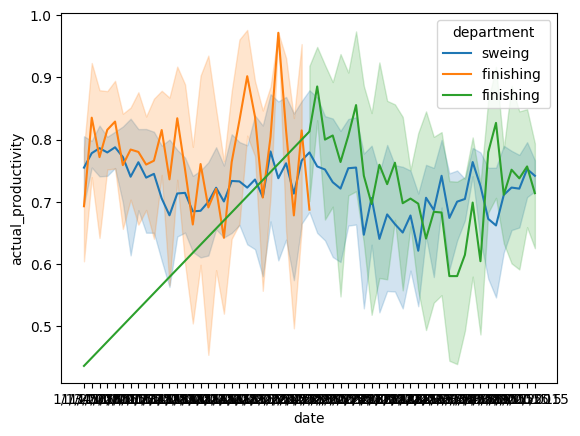

In [ ]:
sns.lineplot(data,x = 'date', y = 'actual_productivity', hue = 'department')

In [ ]:
lp = px.line(data,x = 'date', y = 'actual_productivity', color = 'department')
lp.show()

<Axes: xlabel='incentive', ylabel='actual_productivity'>

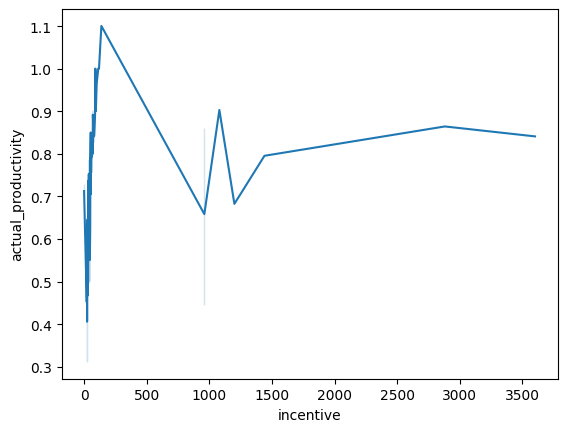

In [ ]:
sns.lineplot(data, x = 'incentive', y = 'actual_productivity')

<Axes: xlabel='day', ylabel='actual_productivity'>

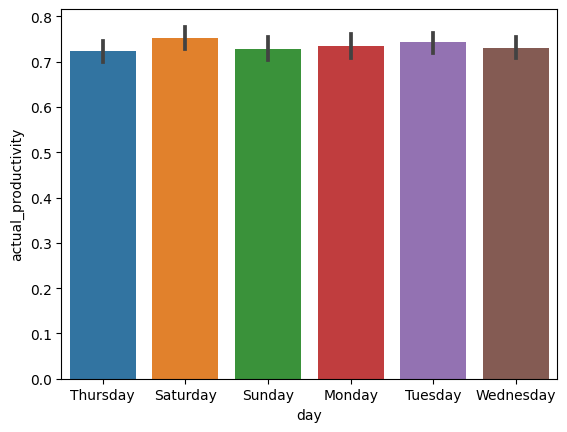

In [ ]:
sns.barplot(data = data, x=data['day'], y=data['actual_productivity'])

<Axes: xlabel='no_of_workers', ylabel='actual_productivity'>

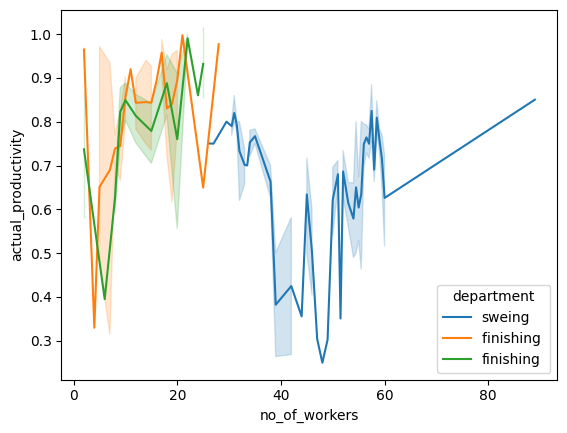

In [ ]:
sns.lineplot(data = data, x=data['no_of_workers'], y=data['actual_productivity'],hue=data['department'])

<Axes: xlabel='idle_time', ylabel='actual_productivity'>

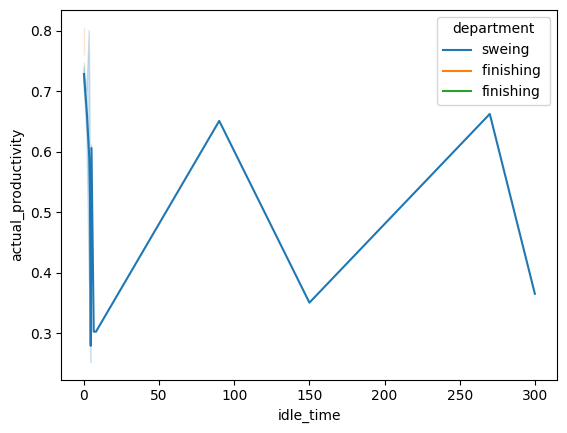

In [ ]:
sns.lineplot(data = data, x=data['idle_time'], y=data['actual_productivity'], hue=data['department'])

<ipython-input-18-b0f566d5eee5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

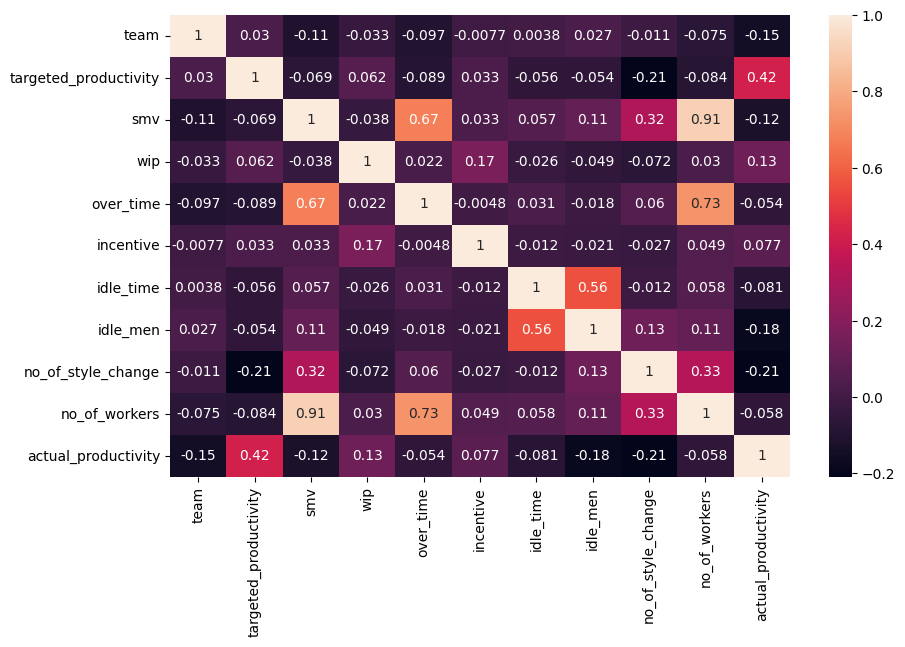

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['actual_productivity'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

In [ ]:
def one_hot_encode(data, columns_to_encode):
    encoded_data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)
    return encoded_data

In [ ]:
data2 = data.drop('date', axis=1)

In [ ]:
categorical_columns = data2.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['quarter', 'department', 'day']

In [ ]:
encoded_data = one_hot_encode(data2, categorical_columns)

In [ ]:
encoded_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,1
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,1
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,1
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_data.shape

(1197, 22)

In [ ]:
mean_normalized_df=(encoded_data-encoded_data.mean())/encoded_data.std()


In [ ]:
mean_actual_productivity = mean_normalized_df['actual_productivity'].mean()
mean_actual_productivity

0.0

In [ ]:
above_mean_df = mean_normalized_df[mean_normalized_df['actual_productivity'] > mean_actual_productivity]
below_mean_df = mean_normalized_df[mean_normalized_df['actual_productivity'] <= mean_actual_productivity]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
ab_means = above_mean_df.describe().loc['mean']

In [ ]:
bl_means = below_mean_df.describe().loc['mean']

In [ ]:
ab_means = ab_means.to_frame()
bl_means = bl_means.to_frame()

In [ ]:
difference = abs(ab_means - bl_means)
difference.sort_values(by='mean', ascending=False)

,mean
actual_productivity,1.621816
targeted_productivity,0.819794
no_of_style_change,0.479388
idle_men,0.269226
quarter_Quarter3,0.228040
team,0.214421
incentive,0.195720
wip,0.183060
idle_time,0.144114
quarter_Quarter5,0.137740


In [ ]:
minmax_normalized_df=(encoded_data-encoded_data.min())/(encoded_data.max()-encoded_data.min())


In [ ]:
mean_actual_productivity = minmax_normalized_df['actual_productivity'].mean()
mean_actual_productivity

0.5654308262347301

In [ ]:
above_mean_df = minmax_normalized_df[minmax_normalized_df['actual_productivity'] > mean_actual_productivity]
below_mean_df = minmax_normalized_df[minmax_normalized_df['actual_productivity'] <= mean_actual_productivity]

In [ ]:
ab_means = above_mean_df.describe().loc['mean']

In [ ]:
bl_means = below_mean_df.describe().loc['mean']

In [ ]:
ab_means = ab_means.to_frame()
bl_means = bl_means.to_frame()

In [ ]:
difference = abs(ab_means - bl_means)
difference.sort_values(by='mean', ascending=False)

,mean
actual_productivity,0.319135
targeted_productivity,0.109932
no_of_style_change,0.102553
quarter_Quarter3,0.086769
team,0.067522
department_finishing,0.055080
quarter_Quarter4,0.041196
day_Sunday,0.037073
quarter_Quarter2,0.033729
smv,0.028964


In [ ]:
encoded_data = encoded_data.drop(['wip'], axis = 1)

In [ ]:
encoded_data.head()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
X = encoded_data.drop(columns='actual_productivity')
y = encoded_data['actual_productivity']

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,team,4.741576
1,targeted_productivity,15.592947
2,smv,18.059788
3,over_time,7.379474
4,incentive,1.131791
5,idle_time,1.504608
6,idle_men,1.570623
7,no_of_style_change,1.579334
8,no_of_workers,48.667939
9,quarter_Quarter2,1.949833


#Model Building

In [ ]:
def train_and_evaluate(X, y, model):
    # List to store results
    results = []

    # Different train-test splits
    for train_size in range(90, 45, -5):
        test_size = 100 - train_size

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size/100, test_size=test_size/100, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        # Store the result
        results.append({
            'Train Size (%)': train_size,
            'Test Size (%)': test_size,
            'Mean Absolute Error': mae
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
model = DecisionTreeRegressor()
dt_results = train_and_evaluate(X, y, model)
tree_error = dt_results['Mean Absolute Error'].min()
dt_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.088808
1,85,15,0.082263
2,80,20,0.092846
3,75,25,0.106865
4,70,30,0.096610
5,65,35,0.102942
6,60,40,0.104693
7,55,45,0.095566
8,50,50,0.103356


In [ ]:
model = RandomForestRegressor()
rf_results = train_and_evaluate(X, y, model)
rf_error = rf_results['Mean Absolute Error'].min()
rf_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.065350
1,85,15,0.069008
2,80,20,0.074573
3,75,25,0.079444
4,70,30,0.078574
5,65,35,0.083070
6,60,40,0.081261
7,55,45,0.077993
8,50,50,0.080119


In [ ]:
model = LinearRegression()
lr_results = train_and_evaluate(X, y, model)
lr_error = lr_results['Mean Absolute Error'].min()
lr_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.105938
1,85,15,0.106423
2,80,20,0.108614
3,75,25,0.111214
4,70,30,0.110824
5,65,35,0.128173
6,60,40,0.127065
7,55,45,0.126445
8,50,50,0.127548


In [ ]:
model = SVR()
svr_results = train_and_evaluate(X, y, model)
svr_error = svr_results['Mean Absolute Error'].min()
svr_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.116385
1,85,15,0.117117
2,80,20,0.122902
3,75,25,0.123751
4,70,30,0.127806
5,65,35,0.131143
6,60,40,0.128963
7,55,45,0.128996
8,50,50,0.128668


In [ ]:
model = xgb.XGBRegressor()
xgb_results = train_and_evaluate(X, y, model)
xgb_error = xgb_results['Mean Absolute Error'].min()
xgb_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.072754
1,85,15,0.074614
2,80,20,0.078751
3,75,25,0.087170
4,70,30,0.081963
5,65,35,0.082821
6,60,40,0.083251
7,55,45,0.083134
8,50,50,0.085132


In [ ]:
model = KNeighborsRegressor()
knn_results = train_and_evaluate(X, y, model)
knn_error = knn_results['Mean Absolute Error'].min()
knn_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.105660
1,85,15,0.107386
2,80,20,0.108698
3,75,25,0.111652
4,70,30,0.112256
5,65,35,0.116634
6,60,40,0.114773
7,55,45,0.112368
8,50,50,0.112974


In [ ]:
model =  Ridge()
ridge_results = train_and_evaluate(X, y, model)
ridge_error = ridge_results['Mean Absolute Error'].min()
ridge_results

,Train Size (%),Test Size (%),Mean Absolute Error
0,90,10,0.106521
1,85,15,0.107148
2,80,20,0.109317
3,75,25,0.112086
4,70,30,0.111510
5,65,35,0.128768
6,60,40,0.127661
7,55,45,0.126813
8,50,50,0.127838


In [ ]:
def get_min_error_and_split(results_df):
    min_error_row = results_df.loc[results_df['Mean Absolute Error'].idxmin()]
    min_error = min_error_row['Mean Absolute Error']
    split_ratio = f"{int(min_error_row['Train Size (%)'])}:{int(min_error_row['Test Size (%)'])}"
    return min_error, split_ratio

In [ ]:
models_results = [dt_results, rf_results, lr_results, svr_results, knn_results, xgb_results, ridge_results]
model_names = ['Decision Tree', 'Random Forest', 'Linear Regression',
               'Support Vector Regression', 'K-Nearest Neighbors',
               'Gradient Boosting (XGBoost)', 'Ridge Regression']

# Compile errors and splits into a DataFrame
errors_data = {'Model': [], 'Error': [], 'Split Ratio (Train:Test)': []}

for model_name, results_df in zip(model_names, models_results):
    min_error, split_ratio = get_min_error_and_split(results_df)
    errors_data['Model'].append(model_name)
    errors_data['Error'].append(min_error)
    errors_data['Split Ratio (Train:Test)'].append(split_ratio)

errors_df = pd.DataFrame(errors_data)
sorted_errors_df = errors_df.sort_values(by='Error')

In [ ]:
sorted_errors_df

,Model,Error,Split Ratio (Train:Test)
1,Random Forest,0.065350,90:10
5,Gradient Boosting (XGBoost),0.072754,90:10
0,Decision Tree,0.082263,85:15
4,K-Nearest Neighbors,0.105660,90:10
2,Linear Regression,0.105938,90:10
6,Ridge Regression,0.106521,90:10
3,Support Vector Regression,0.116385,90:10


In [ ]:
min_value = data['actual_productivity'].min()
max_value = data['actual_productivity'].max()

print(f"Range of values in column 'column_name': {min_value} to {max_value}")

Range of values in column 'column_name': 0.233705476 to 1.1204375


In [ ]:
# function to find mae of different tree sized
# def tree_depth_error(max_nodes, train_X, val_X, train_y, val_y):
#     heart_model = DecisionTreeRegressor(max_leaf_nodes=max_nodes)
#     heart_model.fit(train_X, train_y)
#     preds = heart_model.predict(val_X)
#     mae = mean_absolute_error(val_y, preds)
#     return mae

In [ ]:
# #using tree_depth_error function to find best tree size
# rel = {}
# for nodes in (5, 50, 500, 5000, 50000):
#     my_mae = tree_depth_error(nodes, train_X, val_X, train_y, val_y)
#     rel[my_mae] = nodes
# best_tree_size = rel[min(rel)]
# tree_error = min(rel)
# print("best tree size: %d \t mae: %18.17f" %(best_tree_size, min(rel)))

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.90, test_size=0.10, random_state=42)

#Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300,],
    'max_features': ['auto', 'sqrt', ],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_rf.fit(train_X, train_y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


KeyboardInterrupt: ignored

In [ ]:
best_score_rf = grid_search_rf.best_score_
best_params_rf = grid_search_rf.best_params_
print("Best score for Random Forest: {:.4f}".format(-best_score_rf))
print("Best parameters for Random Forest:", best_params_rf)

In [ ]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7]
}

# Create a base model
xgb = XGBRegressor()

# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search_xgb.fit(train_X, train_y)

In [ ]:
best_score_xgb = grid_search_xgb.best_score_
best_params_xgb = grid_search_xgb.best_params_
print("Best score for XGBoost: {:.4f}".format(-best_score_xgb))
print("Best parameters for XGBoost:", best_params_xgb)

#Neural Network Model

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##Finding optimum Model

In [ ]:


def train_model(optimizer, loss_function, X_train, y_train, epochs=100, batch_size=10, val_split=0.2):
    n_features = X_train.shape[1]

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n_features,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=optimizer, loss=loss_function, metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=val_split)

    val_loss = history.history['val_loss'][-1]
    return val_loss


In [ ]:
results = pd.DataFrame(columns=['Optimizer', 'Loss Function', 'Validation Loss'])

In [ ]:
optimizer_classes = [Adam, SGD, RMSprop, Adagrad, Adadelta, Nadam]
loss_functions = ['mean_absolute_error']

for optimizer_class in optimizer_classes:
    for loss_function in loss_functions:
        optimizer = optimizer_class()
        print(f"Training with optimizer: {optimizer.__class__.__name__} and loss function: {loss_function}")
        val_loss = train_model(optimizer, loss_function, X, y)
        results = results.append({'Optimizer': optimizer.__class__.__name__,
                                  'Loss Function': loss_function,
                                  'Validation Loss': val_loss}, ignore_index=True)



Training with optimizer: Adam and loss function: mean_absolute_error
Epoch 1/100
96/96 [==============================] - 3s 5ms/step - loss: 0.5721 - mean_absolute_error: 0.5721 - val_loss: 0.3418 - val_mean_absolute_error: 0.3418
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - val_loss: 0.2867 - val_mean_absolute_error: 0.2867
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - val_loss: 0.2174 - val_mean_absolute_error: 0.2174
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - val_loss: 0.1579 - val_mean_absolute_error: 0.1579
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - val_loss: 0.1298 - val_mean_absolute_error: 0.1298
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - val_

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Training with optimizer: SGD and loss function: mean_absolute_error
Epoch 1/100
96/96 [==============================] - 1s 5ms/step - loss: 0.5036 - mean_absolute_error: 0.5036 - val_loss: 0.2576 - val_mean_absolute_error: 0.2576
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - val_loss: 0.2062 - val_mean_absolute_error: 0.2062
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - val_loss: 0.1775 - val_mean_absolute_error: 0.1775
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - val_loss: 0.1425 - val_mean_absolute_error: 0.1425
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - val_loss: 0.1295 - val_mean_absolute_error: 0.1295
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - val_l

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Training with optimizer: RMSprop and loss function: mean_absolute_error
Epoch 1/100
96/96 [==============================] - 1s 5ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - val_loss: 0.4342 - val_mean_absolute_error: 0.4342
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - val_loss: 0.3096 - val_mean_absolute_error: 0.3096
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - val_loss: 0.2538 - val_mean_absolute_error: 0.2538
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - val_loss: 0.1860 - val_mean_absolute_error: 0.1860
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - val_loss: 0.1866 - val_mean_absolute_error: 0.1866
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - v

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/100
96/96 [==============================] - 1s 5ms/step - loss: 1.0450 - mean_absolute_error: 1.0450 - val_loss: 0.5726 - val_mean_absolute_error: 0.5726
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.7579 - mean_absolute_error: 0.7579 - val_loss: 0.4099 - val_mean_absolute_error: 0.4099
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6522 - mean_absolute_error: 0.6522 - val_loss: 0.3582 - val_mean_absolute_error: 0.3582
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6074 - mean_absolute_error: 0.6074 - val_loss: 0.3318 - val_mean_absolute_error: 0.3318
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.5563 - mean_absolute_error: 0.5563 - val_loss: 0.3135 - val_mean_absolute_error: 0.3135
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.5534 - mean_absolute_error: 0.5534 - val_loss: 0.3151 - val_mean_absolute_error: 0.3151
Epoch 7/100
96/96 [===

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/100
96/96 [==============================] - 2s 9ms/step - loss: 1.0521 - mean_absolute_error: 1.0521 - val_loss: 0.6823 - val_mean_absolute_error: 0.6823
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 1.0440 - mean_absolute_error: 1.0440 - val_loss: 0.6783 - val_mean_absolute_error: 0.6783
Epoch 3/100
96/96 [==============================] - 1s 5ms/step - loss: 1.0406 - mean_absolute_error: 1.0406 - val_loss: 0.6745 - val_mean_absolute_error: 0.6745
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 1.0163 - mean_absolute_error: 1.0163 - val_loss: 0.6714 - val_mean_absolute_error: 0.6714
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 1.0189 - mean_absolute_error: 1.0189 - val_loss: 0.6681 - val_mean_absolute_error: 0.6681
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.9772 - mean_absolute_error: 0.9772 - val_loss: 0.6646 - val_mean_absolute_error: 0.6646
Epoch 7/100
96/96 [===

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Epoch 1/100
96/96 [==============================] - 2s 6ms/step - loss: 0.5277 - mean_absolute_error: 0.5277 - val_loss: 0.3885 - val_mean_absolute_error: 0.3885
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - val_loss: 0.3281 - val_mean_absolute_error: 0.3281
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - val_loss: 0.2227 - val_mean_absolute_error: 0.2227
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - val_loss: 0.1674 - val_mean_absolute_error: 0.1674
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - val_loss: 0.1329 - val_mean_absolute_error: 0.1329
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - val_loss: 0.1256 - val_mean_absolute_error: 0.1256
Epoch 7/100
96/96 [===

<ipython-input-218-cdd9be6b7920>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
best_model = results.loc[results['Validation Loss'].idxmin()]
print("Best Model Configuration:")
print(best_model)


Best Model Configuration:
Optimizer                         SGD
Loss Function      mean_squared_error
Validation Loss              0.031565
Name: 2, dtype: object


##Final model

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))



In [ ]:
model.compile(
    optimizer='SGD',
    loss='mean_absolute_error',
    metrics=['mean_squared_error']
    )

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               2688      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:


history = model.fit(
    X_train, y_train,
    epochs=120,
    batch_size=10,
    validation_split=0.2
    )

Epoch 1/120
77/77 [==============================] - 7s 8ms/step - loss: 0.4997 - mean_squared_error: 0.4386 - val_loss: 0.3211 - val_mean_squared_error: 0.1248
Epoch 2/120
77/77 [==============================] - 0s 4ms/step - loss: 0.3532 - mean_squared_error: 0.2122 - val_loss: 0.2829 - val_mean_squared_error: 0.0972
Epoch 3/120
77/77 [==============================] - 0s 5ms/step - loss: 0.2728 - mean_squared_error: 0.1305 - val_loss: 0.2119 - val_mean_squared_error: 0.0573
Epoch 4/120
77/77 [==============================] - 0s 5ms/step - loss: 0.2375 - mean_squared_error: 0.1183 - val_loss: 0.1861 - val_mean_squared_error: 0.0461
Epoch 5/120
77/77 [==============================] - 0s 5ms/step - loss: 0.2074 - mean_squared_error: 0.0745 - val_loss: 0.1512 - val_mean_squared_error: 0.0337
Epoch 6/120
77/77 [==============================] - 0s 5ms/step - loss: 0.1897 - mean_squared_error: 0.0611 - val_loss: 0.1502 - val_mean_squared_error: 0.0336
Epoch 7/120
77/77 [===============

In [ ]:
# For loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# If you have other metrics like mean_squared_error
mae = history.history.get('mean_squared_error')
val_mae = history.history.get('val_mean_squared_error')


In [ ]:
sns.set_style("whitegrid")

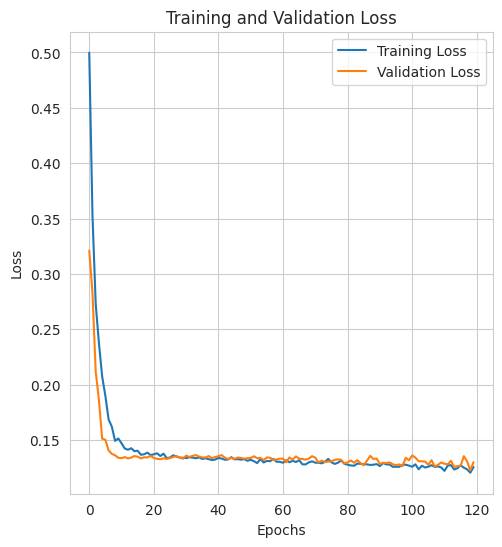

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



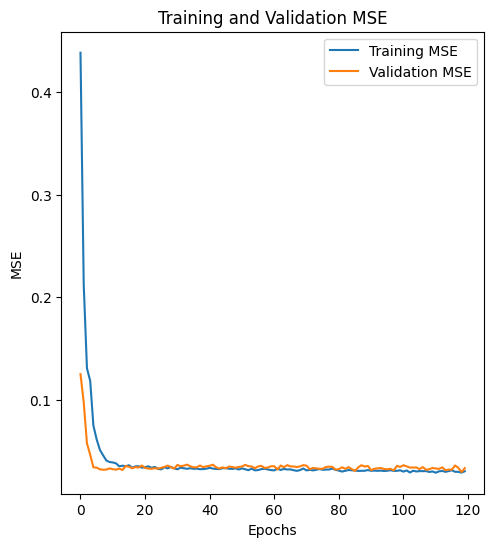

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting other metrics like MSE, if available
if mae and val_mae:
    plt.subplot(1, 2, 2)
    plt.plot(mae, label='Training MSE')
    plt.plot(val_mae, label='Validation MSE')
    plt.title('Training and Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()

plt.show()


In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Mean Squared Error: {mae:.4f}")

8/8 [==============================] - 0s 3ms/step - loss: 0.1243 - mean_squared_error: 0.0292
Test Loss: 0.1243
Mean Squared Error: 0.0292


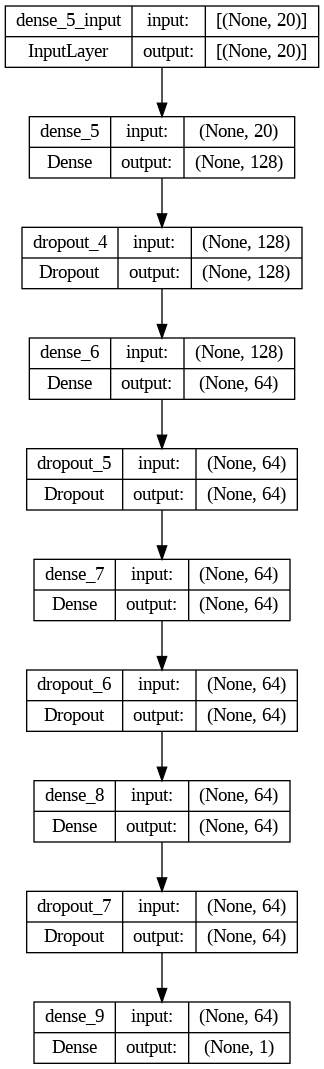

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)